In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 24.1 MB/s 


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from keras import layers
from keras import models
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization, Input, MaxPooling2D
from tensorflow.keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow_addons as tfa
from tensorflow.keras.callbacks import ModelCheckpoint
import plotly.express as px
from numpy import expand_dims
from keras.applications import InceptionV3

In [ ]:
train_df = pd.read_csv("/content/drive/MyDrive/Kompjuterski vid/Projekat/dataset1/sign_mnist_train.csv")
test_df = pd.read_csv("/content/drive/MyDrive/Kompjuterski vid/Projekat/dataset1/sign_mnist_test.csv")

In [ ]:
test = pd.read_csv("/content/drive/MyDrive/Kompjuterski vid/Projekat/dataset1/sign_mnist_test.csv")
y = test['label']

In [ ]:
labele = ['A','B','C','D','E','F','G','H','I','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y']

In [ ]:
y_train = train_df['label']
y_test = test_df['label']
del train_df['label']
del test_df['label']

In [ ]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.fit_transform(y_test)

In [ ]:
x_train = train_df.values
x_test = test_df.values

In [ ]:
x_train_rgb_pom = x_train.reshape(-1,28,28,1)
x_test_rgb_pom = x_test.reshape(-1,28,28,1)

images = tf.convert_to_tensor(x_train_rgb_pom, dtype=tf.uint8)
x_train = tf.image.grayscale_to_rgb(images,name=None)

images1 = tf.convert_to_tensor(x_test_rgb_pom, dtype=tf.uint8)
x_test = tf.image.grayscale_to_rgb(images1,name=None)

In [ ]:
def plot_loss_accuracy(history):
  epochs = [i for i in range(20)]
  fig , ax = plt.subplots(1,2)
  train_acc = history.history['accuracy']
  train_loss = history.history['loss']
  val_acc = history.history['val_accuracy']
  val_loss = history.history['val_loss']
  fig.set_size_inches(16,9)
  
  ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
  ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
  ax[0].set_title('Training & Validation Accuracy')
  ax[0].legend()
  ax[0].set_xlabel("Epochs")
  ax[0].set_ylabel("Accuracy")
  
  ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
  ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
  ax[1].set_title('Training & Validation Loss')
  ax[1].legend()
  ax[1].set_xlabel("Epochs")
  ax[1].set_ylabel("Loss")
  plt.show()

**Inception**

In [ ]:
x_train= tf.image.resize(x_train, [75, 75])
x_test = tf.image.resize(x_test, [75, 75])

In [ ]:
print(x_train.shape)
print(x_test.shape)

(27455, 75, 75, 3)
(7172, 75, 75, 3)


In [ ]:
datagen_train = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    validation_split=0.20,
    preprocessing_function = tf.keras.applications.inception_v3.preprocess_input)
datagen_train.fit(x_train)

In [ ]:
x_test = tf.keras.applications.inception_v3.preprocess_input(x_test)

In [ ]:
conv_base = tf.keras.applications.inception_v3.InceptionV3(weights='imagenet', include_top=False, input_shape=(75,75,3))

87910968/87910968 [==============================] - 5s 0us/step


In [ ]:
conv_base.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 75, 75, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 37, 37, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 37, 37, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 activation (Activation)        (None, 37, 37, 32)   0           ['batch_normalization[

In [ ]:
for layer in conv_base.layers[:301]:
    layer.trainable = False
for i, layer in enumerate(conv_base.layers):
    print(i, layer.name, layer.trainable)

0 input_1 False
1 conv2d False
2 batch_normalization False
3 activation False
4 conv2d_1 False
5 batch_normalization_1 False
6 activation_1 False
7 conv2d_2 False
8 batch_normalization_2 False
9 activation_2 False
10 max_pooling2d False
11 conv2d_3 False
12 batch_normalization_3 False
13 activation_3 False
14 conv2d_4 False
15 batch_normalization_4 False
16 activation_4 False
17 max_pooling2d_1 False
18 conv2d_8 False
19 batch_normalization_8 False
20 activation_8 False
21 conv2d_6 False
22 conv2d_9 False
23 batch_normalization_6 False
24 batch_normalization_9 False
25 activation_6 False
26 activation_9 False
27 average_pooling2d False
28 conv2d_5 False
29 conv2d_7 False
30 conv2d_10 False
31 conv2d_11 False
32 batch_normalization_5 False
33 batch_normalization_7 False
34 batch_normalization_10 False
35 batch_normalization_11 False
36 activation_5 False
37 activation_7 False
38 activation_10 False
39 activation_11 False
40 mixed0 False
41 conv2d_15 False
42 batch_normalization_15 False

In [ ]:
conv_base.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 75, 75, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 37, 37, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 37, 37, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 activation (Activation)        (None, 37, 37, 32)   0           ['batch_normalization[

In [ ]:
x = conv_base.output
x = Flatten()(x)
x = Dense(24, activation='softmax')(x)
model = Model(inputs=conv_base.input, outputs=x)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 75, 75, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 37, 37, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 37, 37, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 activation (Activation)        (None, 37, 37, 32)   0           ['batch_normalization[0][0]']

In [ ]:
path = '/content/drive/MyDrive/Kompjuterski vid/Projekat/Projekat_v4/Modeli_v4/model_ft_inception.hdf5'

save_callback = ModelCheckpoint(
  filepath=path,
  save_best_only=True,
  monitor="val_loss",
  verbose=1,
)

In [ ]:
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy', metrics = ['accuracy', tfa.metrics.F1Score(num_classes=24),tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

In [ ]:
tf.config.experimental_run_functions_eagerly(True)

Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.


In [ ]:
history = model.fit(datagen_train.flow(x_train,y_train, batch_size = 32, subset='training'), 
                                  validation_data=datagen_train.flow(x_train,y_train, batch_size = 8, subset='validation'), 
                                  epochs=20, verbose=1, callbacks=[save_callback])

/usr/local/lib/python3.8/dist-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/20
687/687 [==============================] - ETA: 0s - loss: 0.7907 - accuracy: 0.7876 - f1_score: 0.7873 - precision: 0.9325 - recall: 0.6104
Epoch 1: val_loss improved from inf to 0.39170, saving model to /content/drive/MyDrive/Kompjuterski vid/Projekat/Projekat_v4/Modeli_v4/model_ft_inception.hdf5
687/687 [==============================] - 262s 369ms/step - loss: 0.7907 - accuracy: 0.7876 - f1_score: 0.7873 - precision: 0.9325 - recall: 0.6104 - val_loss: 0.3917 - val_accuracy: 0.8966 - val_f1_score: 0.8957 - val_precision: 0.9468 - val_recall: 0.8162
Epoch 2/20
687/687 [==============================] - ETA: 0s - loss: 0.3053 - accuracy: 0.9206 - f1_score: 0.9203 - precision: 0.9571 - recall: 0.8620
Epoch 2: val_loss improved from 0.39170 to 0.25098, saving model to /content/drive/MyDrive/Kompjuterski vid/Projekat/Projekat_v4/Modeli_v4/model_ft_inception.hdf5
687/687 [==============================] - 245s 357ms/step - loss: 0.3053 - accuracy: 0.9206 - f1_score: 0.9203 - p

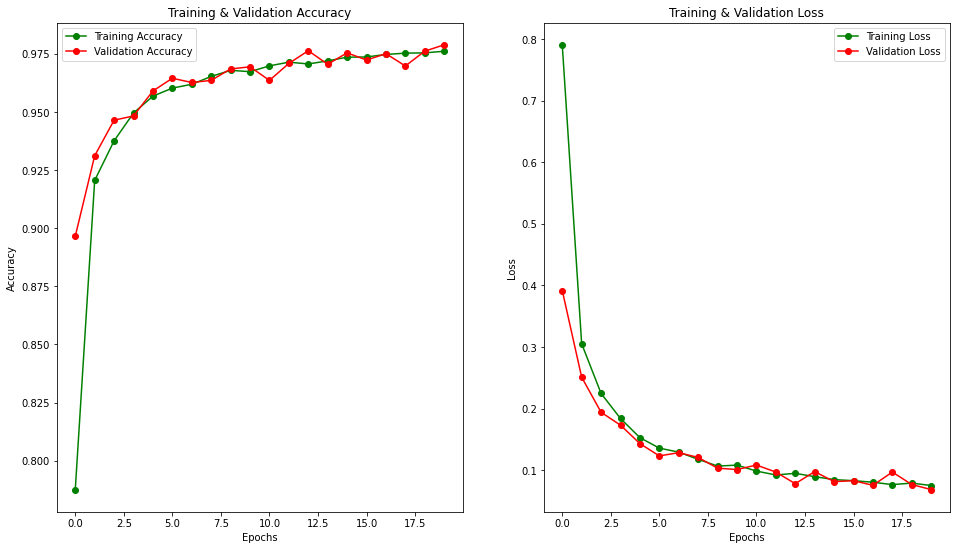

In [ ]:
plot_loss_accuracy(history)

In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/Kompjuterski vid/Projekat/Projekat_v4/Modeli_v4/model_ft_inception.hdf5')

In [ ]:
model.evaluate(x_test,y_test)

225/225 [==============================] - 26s 116ms/step - loss: 0.1238 - accuracy: 0.9547 - f1_score: 0.9534 - precision: 0.9587 - recall: 0.9483


[0.12380073964595795,
 0.9546849131584167,
 array([0.9984917 , 0.97630334, 0.9645161 , 0.92460316, 0.969578  ,
        0.9704141 , 0.9680111 , 0.9619048 , 0.9896552 , 0.94545454,
        0.9951923 , 0.8853333 , 0.8916968 , 0.9635627 , 0.9971182 ,
        0.99696046, 0.9028213 , 0.8349146 , 0.9773196 , 0.95551264,
        0.9379728 , 0.9468822 , 0.9440298 , 0.9836553 ], dtype=float32),
 0.958697497844696,
 0.9482710361480713]

In [ ]:
x_train = tf.keras.applications.inception_v3.preprocess_input(x_train)
model.evaluate(x_train,y_train)

858/858 [==============================] - 99s 115ms/step - loss: 0.0235 - accuracy: 0.9945 - f1_score: 0.9945 - precision: 0.9954 - recall: 0.9937


[0.023505622521042824,
 0.9945001006126404,
 array([0.9920494 , 0.99950475, 0.9991266 , 0.9974958 , 0.9968685 ,
        0.9983416 , 0.99862444, 0.9985185 , 0.9987086 , 0.9937556 ,
        0.9979863 , 0.97490346, 0.98783666, 0.99874634, 1.        ,
        1.        , 0.9899769 , 0.9854591 , 0.9991561 , 0.98408604,
        0.9869525 , 0.9946743 , 0.99871194, 0.99554765], dtype=float32),
 0.9953663349151611,
 0.9936623573303223]

In [ ]:
predict_x= model.predict(x_test) 
predictions=np.argmax(predict_x,axis=1)
print(predictions)

225/225 [==============================] - 22s 97ms/step
[6 5 9 ... 2 4 2]


In [ ]:
for i in range(len(predictions)):
    if(predictions[i] >= 9):
        predictions[i] += 1

In [ ]:
print(classification_report(y,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       331
           1       1.00      0.95      0.98       432
           2       0.96      0.96      0.96       310
           3       0.90      0.95      0.92       245
           4       0.95      0.99      0.97       498
           5       0.95      1.00      0.97       247
           6       0.94      1.00      0.97       348
           7       1.00      0.93      0.96       436
           8       0.98      1.00      0.99       288
          10       0.95      0.94      0.95       331
          11       1.00      0.99      1.00       209
          12       0.93      0.84      0.89       394
          13       0.94      0.85      0.89       291
          14       0.96      0.97      0.96       246
          15       1.00      1.00      1.00       347
          16       0.99      1.00      1.00       164
          17       0.82      1.00      0.90       144
          18       0.78    

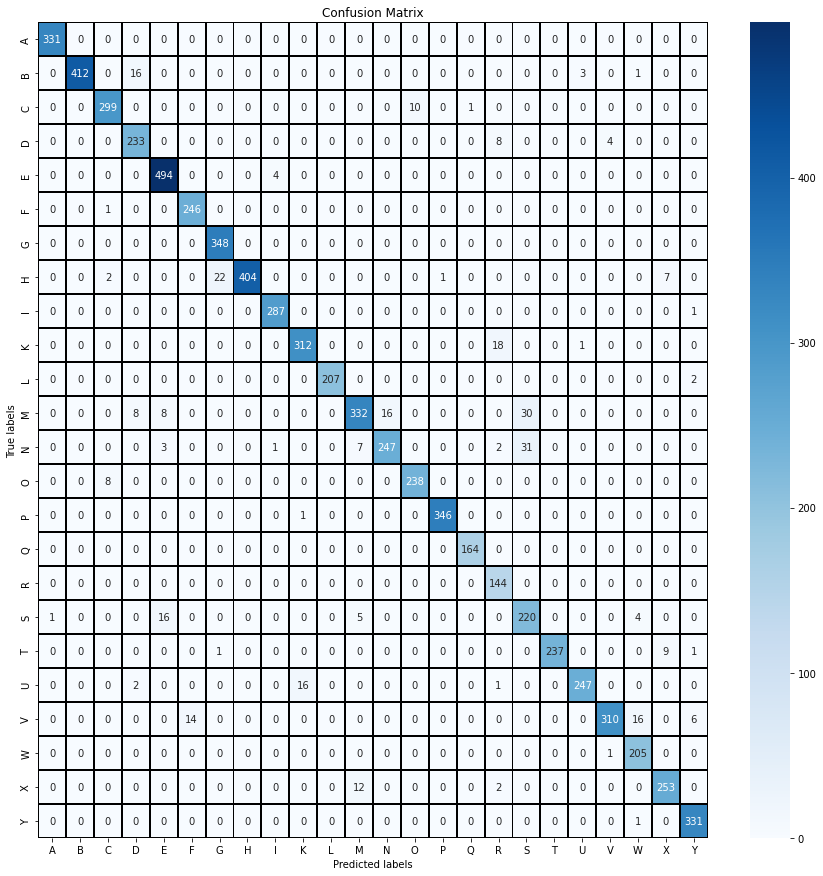

In [ ]:
cm = confusion_matrix(y,predictions)
cm = pd.DataFrame(cm, index = [i for i in range(25) if i!=9] , columns = [i for i in range(25) if i!=9])
plt.figure(figsize = (15,15))
ax= plt.subplot()
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labele); ax.yaxis.set_ticklabels(labele);